In [64]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [65]:
#method to read dataset using pandas
#no need of double backslash in the path
def read_csv_file():
    df = pd.read_csv("E:\\Datasets\\Kaggle\\Sonar_Mine_or_Rock\\sonar.all-data.csv", engine='python')
    
    #see how the data looks. Prints the first 5 rows of the data frame
    df.head()
    
    #check the number of columns present in the dataframe df
    print("No. of columns in the data frame: ",len(df.columns))
    
    #split the data into features and labels
    #here, X = features and Y = Label
    X = df[df.columns[0:60]].values
    
    print("\nfeatures array X: ", X)
    print("\nshape of features X: ",X.shape)
    
    y = df[df.columns[60]]
    print("\nlabel array Y:\n", y)
    
    #Encode the dependent variable, y, using LabelEncoder
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)
    
    #store the result in Y
    Y = one_hot_encode(y)
    print("after label encoding Y is: ", Y)
    
    #return the features and label
    return(X, Y)
    

#one_hot_encoding method
def one_hot_encode(labels):
    n_labels = len(labels)
    print("n_labels: ", n_labels)
    n_unique_labels = len(np.unique(labels))
    print("\nn_unique_labels: ", n_unique_labels)
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    
    print("\none_hot_encode:", one_hot_encode)
    one_hot_encode[np.arange(n_labels),labels] = 1
    print("\nfinal one_hot_encode: ", one_hot_encode)
    return one_hot_encode



In [57]:
#reading the data set to mix up rows since the data has mines and rocks continously
X, Y = read_csv_file()

X, Y = shuffle(X, Y, random_state=1)

print("after shuffling the features, labels:")
print("X is: ", X)
print("Y is",Y)

#convert the data into train and test
#test data size is 20%
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.02, random_state =415)

#check the shape of train and test data
print("train data X shape: ",train_x.shape)
print("train data Y shape:",train_y.shape)
print("testing data X shape",test_x.shape)


No. of columns in the data frame:  61

features array X:  [[0.0453 0.0523 0.0843 ... 0.0049 0.0052 0.0044]
 [0.0262 0.0582 0.1099 ... 0.0164 0.0095 0.0078]
 [0.01   0.0171 0.0623 ... 0.0044 0.004  0.0117]
 ...
 [0.0522 0.0437 0.018  ... 0.0138 0.0077 0.0031]
 [0.0303 0.0353 0.049  ... 0.0079 0.0036 0.0048]
 [0.026  0.0363 0.0136 ... 0.0036 0.0061 0.0115]]

shape of features X:  (207, 60)

label array Y:
 0      R
1      R
2      R
3      R
4      R
5      R
6      R
7      R
8      R
9      R
10     R
11     R
12     R
13     R
14     R
15     R
16     R
17     R
18     R
19     R
20     R
21     R
22     R
23     R
24     R
25     R
26     R
27     R
28     R
29     R
      ..
177    M
178    M
179    M
180    M
181    M
182    M
183    M
184    M
185    M
186    M
187    M
188    M
189    M
190    M
191    M
192    M
193    M
194    M
195    M
196    M
197    M
198    M
199    M
200    M
201    M
202    M
203    M
204    M
205    M
206    M
Name: R, Length: 207, dtype: object
n_label

In [66]:
#define the important parameters and variables for tensorflow

learning_rate = 0.03
training_epochs = 1000
cost_history = np.empty(shape = [1], dtype=float)

print("cost_history: ",cost_history)
n_dim = X.shape[1]
print("n_dim: ",n_dim)

#since there are only 2 categories rock and mine
n_class = 2

#save the model in desired path
model_path = "E:\\Datasets\\Kaggle\\SonarModel"

cost_history:  [1.]
n_dim:  60


In [67]:
#define no. of hidden layers and no. of neurons in each layer

n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

x = tf.placeholder(tf.float32, [None, n_dim])

W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

                

In [68]:
#define the model
def multilayer_perceptron(x, weights, biases):
    
    #first hidden layer with sigmoid activation function
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    #second hidden layer with sigmoid activation function
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    #third hidden layer with sigmoid activation function
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    #fourth hidden layer with RELU activation function
    layer_4 = tf.add(tf.matmul(x, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    #final output layer
    output_layer = tf.add(tf.matmul(layer_4, weights['out']), biases['out'])
    return output_layer
    

In [69]:
#define the weights and biases for each layer

#note: tf.truncated_normal() selects random numbers from a normal distribution whose mean is close to 0 and values are close to 0 Ex. -0.1 to 0.1. 
#It's called truncated because your cutting off the tails from a normal distribution.

weights = {
    'h1' : tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2' : tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3' : tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4' : tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out' : tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}

biases = {
    'b1' : tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2' : tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3' : tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4' : tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out' : tf.Variable(tf.truncated_normal([n_class])),
}

In [ ]:
#initialize all the variables
init = tf.global_variables_initializer()

#create a saver object to save the model
saver = tf.train.Saver()


#call the model defined above
#y is the output layer
y = multilayer_perceptron(x, weights, biases)


#define the cost function/loss function
#y_ is the actual output
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))

#define optimizer
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

#create a session object to launch the graph
sess = tf.Session()

#this will initailze all the variables
sess.run(init)

#calculate the cost and accuracy in each epoch

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict= {x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict= {x: train_x, y_: train_y})
    cost_histroy = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
    
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    pred_y = sess.run(y,feed_dict= {x:test_x})
    
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = sess.run(accuracy,feed_dict= {x: train_x, y_:train_y})
    accuracy_history.append(accuracy)
    
    print('epoch: ',epoch,' - ','cost:',cost,' -MSE:',mse_," -Train Accuracy: ",accuracy)
save_path = saver.save(sess, model_path)
print("Model saved at path: %s", save_path)
    


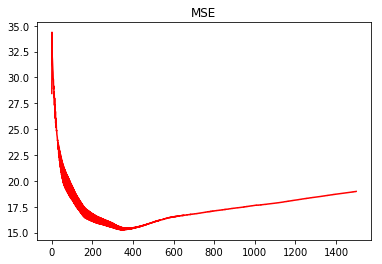

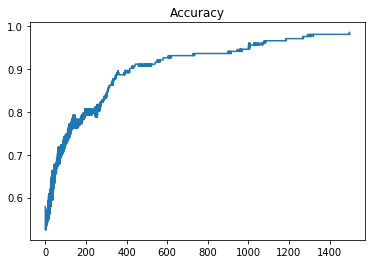

Test Accuracy:  1.0
MSE: 18.9834


In [63]:
# Plot MSE and accuracy graph
plt.title("MSE")
plt.plot(mse_history,'r')
plt.show()
plt.title("Accuracy")
plt.plot(accuracy_history)
plt.show()
    
# Print the final accuracy
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Test Accuracy: ",(sess.run(accuracy, feed_dict={x:test_x, y_:test_y})))

# Print final MSE
pred_y = sess.run(y, feed_dict={x:test_x})
mse = tf.reduce_mean(tf.square(pred_y-test_y))
print("MSE: %.4f"%sess.run(mse))